In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# read cik.csv
cik_df = pd.read_csv('../cik.csv')
cik_df.shape

(503, 1)

In [29]:
cik_df.head()

,CIK
0,66740
1,91142
2,1800
3,1551152
4,1467373


In [30]:
# Load the JSON file
with open('../datasets/EXTRACTED_FILINGS.json', 'r') as json_file:
    data = json.load(json_file)
extracted_filings = pd.DataFrame(data)

# CONDUCT EDA FOR DATA AND METRICS

In [ ]:
data = pd.read_csv(path + all_files[0])
metric_name = all_files[0].split('.')[0]

# Overview of data

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\n")

# Get basic information about the dataset
print("Basic information of the dataset:")
print(data.info())
print("\n")

# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe())

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Data visualizations


# Distribution of 'val'
sns.histplot(data['val'], kde=True)
plt.title('Distribution of val')
plt.xlabel('val')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'val' to identify outliers
sns.boxplot(x=data['val'])
plt.title('Boxplot of val')
plt.xlabel('val')
plt.show()


# Distribution of 'val'
sns.histplot(data['val'], kde=True)
plt.title('Distribution of val')
plt.xlabel('val')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'val' to identify outliers
sns.boxplot(x=data['val'])
plt.title('Boxplot of val')
plt.xlabel('val')
plt.show()


# Group val per item, cik and year

# Count of unique values for each column
print(data['item'].value_counts())
print(data['cik'].value_counts())
print(data['year'].value_counts())

# Bar chart for 'item'
plt.figure(figsize=(10, 6))
sns.countplot(x='item', data=data, order=data['item'].value_counts().index)
plt.title('Count of Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar chart for 'CIK'
cik_counts = data['cik'].value_counts() # Count values for CIK
top_10_cik_counts = cik_counts.head(10) # Extract top 10 CIK values for better visualization

# Create a pie chart for top 10 CIK values
plt.figure(figsize=(8, 8))
plt.pie(top_10_cik_counts, labels=top_10_cik_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 CIK Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Line chart for 'year'
year_counts = data['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Count of Data Entries per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
extracted_filings['cik'] = extracted_filings['cik'].astype(int)
cik_df['CIK'] = cik_df['CIK'].astype(int)

In [32]:
# compare the list of cik in cik.csv and extracted_filings and print out the ones that are not in the extracted_filings
cik_df[~cik_df['CIK'].isin(extracted_filings['cik'])]

,CIK
115,831001
215,1932393
274,1944048


In [33]:
extracted_filings.head()

,cik,company,year,item_1A,item_7,item_7A
0,1000228,SCHEIN HENRY INC,2005,The healthcare products distribution industry ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
1,1000228,HENRY SCHEIN INC,2006,The healthcare products distribution industry ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
2,1000228,HENRY SCHEIN INC,2007,The healthcare products distribution industry ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
3,1000228,HENRY SCHEIN INC,2008,Declining economic conditions could adversely ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
4,1000228,HENRY SCHEIN INC,2009,Declining economic conditions could adversely ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."


Text(0.5, 1.0, 'Distribution of Filings in Years')

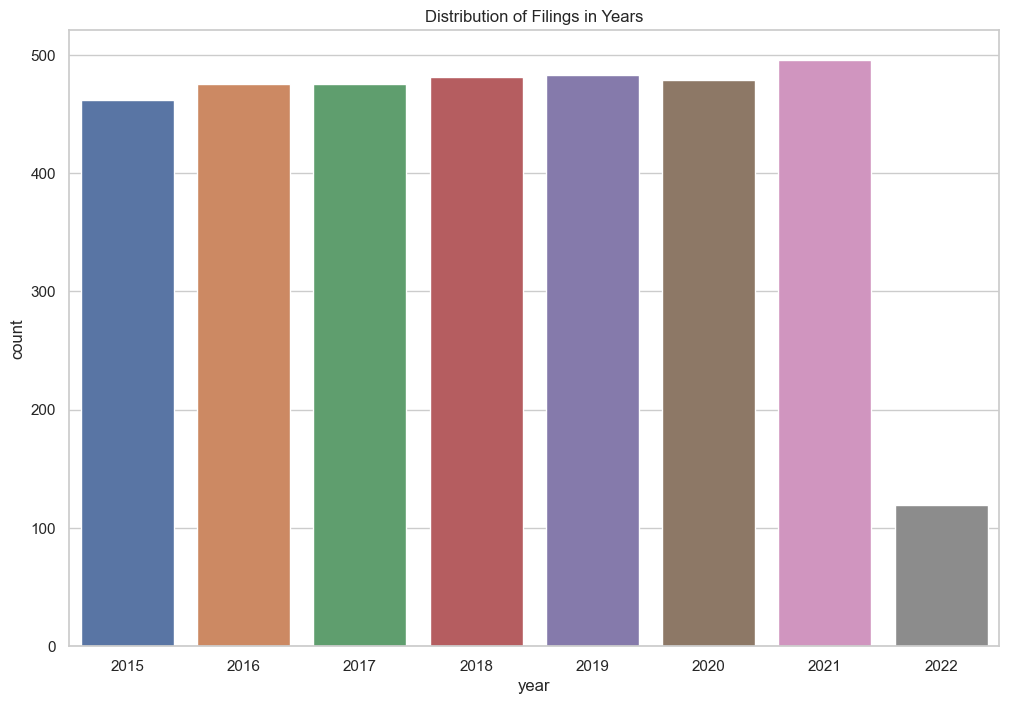

In [34]:
# Plot the distribution of filings in years 2015-2022
extracted_filings['year'] = extracted_filings['year'].astype(int)
df_2015 = extracted_filings[extracted_filings['year'] >= 2015]
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=df_2015)
plt.title('Distribution of Filings in Years')

# ANALYSIS OF EXTRACTED FLS WITH METRICS

In [35]:
# Load the JSON file
with open('../datasets/EXTRACTED_FLS_METRICS.json', 'r') as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data)

In [36]:
df.head()

,Sentence,Metric,Item,Year,CIK,Company,FLS
0,"In the future, we may be unable to compete suc...",Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
1,Our revenues and profitability depend on our r...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
2,Our future revenues and profitability depend o...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
3,We experience fluctuations in quarterly earnings.,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
4,Revenues and profitability generally have been...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS


In [37]:
# number of companies analyzed
df['CIK'].value_counts()

1099219    3427
1137774    3381
874766     2852
899051     2136
5272       1933
           ... 
1022079      21
1841666      19
36104        13
1868275       9
106535        2
Name: CIK, Length: 490, dtype: int64

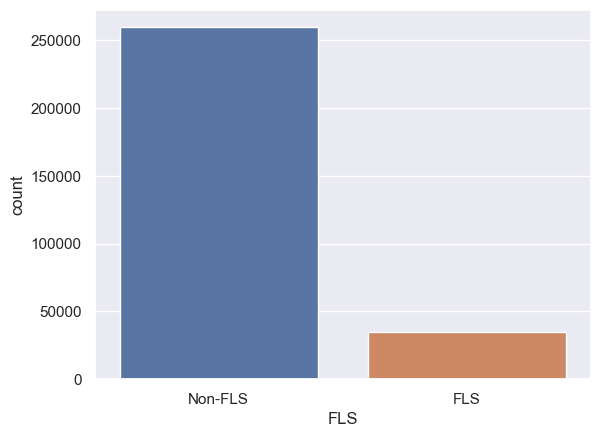

In [38]:
# draw a graph to show the distribution of FLS and non-FLS 
sns.set(style="darkgrid")
ax = sns.countplot(x="FLS", data=df)
plt.show()


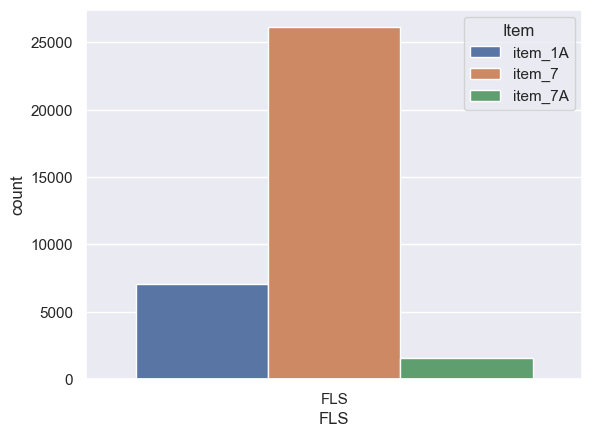

In [46]:
# draw graph to show FLS per item
df_fls = df[df['FLS'] == 'FLS']
sns.set(style="darkgrid")
ax = sns.countplot(x="FLS", hue="Item", data=df_fls)
plt.show()

In [49]:
# number of extracted sentences per metric
df['Metric'].value_counts()

Revenue                  162900
Net Income               109302
EBIT                      16797
EPS                        4729
Cash Flow (Investing)       364
Cash Flow (Financing)       130
Cash Flow (Operating)        32
Name: Metric, dtype: int64

In [51]:
# count number of fls
df['FLS'].value_counts()

Non-FLS    259525
FLS         34729
Name: FLS, dtype: int64

In [52]:
# count number of FLS per item
df_fls = df[df['FLS'] == 'FLS'] 
df_fls[['Item','FLS']].groupby('Item').count()

,FLS
Item,
item_1A,7042
item_7,26120
item_7A,1567


<Axes: xlabel='Metric'>

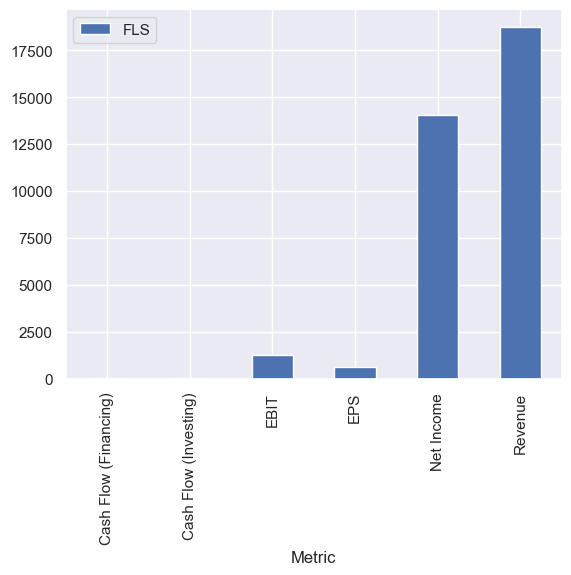

In [54]:
# plot number of fls per metric
df_fls[['Metric','FLS']].groupby('Metric').count().plot(kind='bar')

In [41]:
# plot number of metrics
df['Metric'].value_counts()

Revenue                  162900
Net Income               109302
EBIT                      16797
EPS                        4729
Cash Flow (Investing)       364
Cash Flow (Financing)       130
Cash Flow (Operating)        32
Name: Metric, dtype: int64

In [42]:
ebit = df[df['Metric']=="EBIT"][140:400]
ebit.to_csv('ebit.csv', index=False)

In [43]:
eps = df[df['Metric']=="EPS"][1500:2000]
eps.to_csv('eps.csv', index=False)

In [44]:
df.shape

(294254, 7)

In [45]:
cfo = df[df['Metric']=="Cash Flow (Operating)"]
cfo.reset_index(drop=True, inplace=True)
cfo.to_csv('cfo.csv', index=False)

In [55]:
df_fls.shape

(34729, 7)

## Sample data for reviewing sentences with metrics

In [15]:
# Take a random sample of 100 rows from EXTRACT_FLS_METRICS.csv for review (each category about 20 rows)
# Load data 
df = pd.read_csv('../datasets/EXTRACTED_FLS_METRICS.csv')
df['Metric'].value_counts()

Metric
Revenue                  162900
Net Income               109302
EBIT                      16797
EPS                        4729
Cash Flow (Investing)       364
Cash Flow (Financing)       130
Cash Flow (Operating)        32
Name: count, dtype: int64

In [32]:
# Create an empty DataFrame with the same columns as df
df_sample = pd.DataFrame(columns=df.columns)

# Get unique values from the 'Metric' column
metric_list = df['Metric'].unique()

sampled_data = []  # List to hold sampled DataFrames

for metric in metric_list:
    # Filter the DataFrame for each unique metric
    df_metric = df[df['Metric'] == metric]
    # Sample 20 rows for each unique metric and append to the list
    df_metric_sampled = df_metric.sample(n=20, random_state=42)
    sampled_data.append(df_metric_sampled)

# Concatenate all sampled DataFrames in the list
df_sample = pd.concat(sampled_data)

# Save the combined sampled data to a CSV file
df_sample.to_csv('../datasets/EXTRACTED_FLS_METRICS_REVIEW_SAMPLE.csv', header=True, index=False)


In [22]:
df[df['Sentence']=='Cash flows (in thousands): Operating Activities For the year ended December 31, 2019, cash flows from operations of $747.3 million was primarily comprised of our net income of approximately $442.8 million as well as the following: Significant non-cash activities • Stock-based compensation of $88.2 million related to equity awards granted to employees and directors; • Depreciation and amortization of $79.0 million related to our investments in property, plant and equipment and intangible assets; • Impairment charges of $28.5 million related to decreases in the fair value of certain assets related to the closure of our Invisalign stores; • Non-cash operating lease costs of $18.5 million; and • Gain from the sale of equity method investment of $15.8 million.']

,Sentence,Metric,Item,Year,CIK,Company,FLS
96195,Cash flows (in thousands): Operating Activitie...,Net Income,item_7,2019,1097149,ALIGN TECHNOLOGY INC,Non-FLS
96196,Cash flows (in thousands): Operating Activitie...,Revenue,item_7,2019,1097149,ALIGN TECHNOLOGY INC,Non-FLS


In [23]:
df[df['Sentence']=='The following table presents a reconciliation of net income to Adjusted EBITDA attributable to Generac Holdings Inc.: (a) Includes the noncontrolling interests’ share of expenses related to Pramac purchase accounting, including intangible amortization of $4.3 million, $4.2 million, and $4.6 million for the years ended December 31, 2020, 2019, and 2018, respectively.']

,Sentence,Metric,Item,Year,CIK,Company,FLS
138966,The following table presents a reconciliation ...,Net Income,item_7,2020,1474735,GENERAC HOLDINGS INC.,Non-FLS
138967,The following table presents a reconciliation ...,Revenue,item_7,2020,1474735,GENERAC HOLDINGS INC.,Non-FLS


In [24]:
df[df['Sentence']=='Excluding these non-core items, operating earnings decreased primarily due to lower selling prices more than offsetting lower raw material and energy costs by $74 million, partially offset by higher sales volumes of $20 million.']

,Sentence,Metric,Item,Year,CIK,Company,FLS
265390,"Excluding these non-core items, operating earn...",Net Income,item_7,2017,915389,EASTMAN CHEMICAL CO,Non-FLS


In [25]:
df[df['Sentence']=='Bonuses to field and executive management in 2017 were up 4.7% as compared with 2016, primarily as a result of a 4.5% increase in operating income.']

,Sentence,Metric,Item,Year,CIK,Company,FLS
221819,Bonuses to field and executive management in 2...,Revenue,item_7,2017,746515,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,Non-FLS
221820,Bonuses to field and executive management in 2...,EBIT,item_7,2017,746515,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,Non-FLS


In [26]:
df[df['Sentence']=='Specifically, our high level of debt could have important consequences, including the following: • making it more difficult for us to satisfy our obligations to service our debt as described above; • limiting our ability to obtain additional financing to fund future working capital, capital expenditures, acquisitions or other general corporate requirements; • requiring a substantial portion of our cash flows to be dedicated to debt service payments instead of other purposes, thereby reducing the amount of cash flows available for working capital, capital expenditures, acquisitions and other general corporate purposes; • utilizing large portions of our U.S. cash to service our debt obligations because those payments are made in the United States, which may require us to repatriate cash from outside the United States; • increasing our vulnerability to general adverse economic and industry conditions; • exposing us to the risk of increased interest rates as certain of our borrowings, including borrowings under our revolving credit facility, are at variable rates of interest; • limiting our flexibility in planning for and reacting to changes in the industry in which we compete; • placing us at a disadvantage compared to other, less leveraged competitors and competitors that have greater access to capital resources; • limiting our interest deductions for US income tax purposes; and • increasing our cost of borrowing.']

,Sentence,Metric,Item,Year,CIK,Company,FLS
46147,"Specifically, our high level of debt could hav...",Revenue,item_1A,2017,813672,CADENCE DESIGN SYSTEMS INC,FLS
46177,"Specifically, our high level of debt could hav...",Revenue,item_1A,2018,813672,CADENCE DESIGN SYSTEMS INC,FLS


In [27]:
def show_sentence(sentence):
    return df[df['Sentence']==sentence]

In [28]:
show_sentence('Non-Operating Income, net: Non-operating income, net consists primarily of interest income, net foreign currency exchange gains (losses), the noncontrolling interests in the net profits of our majority-owned subsidiaries (primarily Oracle Financial Services Software Limited and Oracle Corporation Japan) and net other income (losses), including net realized gains and losses related to all of our investments and net unrealized gains and losses related to the small portion of our investment portfolio that we classify as trading.')

,Sentence,Metric,Item,Year,CIK,Company,FLS
126490,"Non-Operating Income, net: Non-operating incom...",Net Income,item_7,2018,1341439,ORACLE CORP,Non-FLS
126491,"Non-Operating Income, net: Non-operating incom...",Revenue,item_7,2018,1341439,ORACLE CORP,Non-FLS
126492,"Non-Operating Income, net: Non-operating incom...",EBIT,item_7,2018,1341439,ORACLE CORP,Non-FLS


In [29]:
show_sentence('Short-Term Investments - Xcel Energy Inc., NSP-Minnesota, NSP-Wisconsin, PSCo and SPS maintain cash operating and short-term investment accounts.')

,Sentence,Metric,Item,Year,CIK,Company,FLS
217655,"Short-Term Investments - Xcel Energy Inc., NSP...",Cash Flow (Operating),item_7,2015,72903,XCEL ENERGY INC,Non-FLS
217721,"Short-Term Investments - Xcel Energy Inc., NSP...",Cash Flow (Operating),item_7,2016,72903,XCEL ENERGY INC,Non-FLS
217806,"Short-Term Investments - Xcel Energy Inc., NSP...",Cash Flow (Operating),item_7,2017,72903,XCEL ENERGY INC,Non-FLS
217897,"Short-Term Investments - Xcel Energy Inc., NSP...",Cash Flow (Operating),item_7,2018,72903,XCEL ENERGY INC,Non-FLS
217956,"Short-Term Investments - Xcel Energy Inc., NSP...",Cash Flow (Operating),item_7,2019,72903,XCEL ENERGY INC,Non-FLS


In [48]:
# Import the required libraries
import pandas as pd
from sklearn.metrics import classification_report

# Reload data reviews and draw classification report
df = pd.read_csv('../datasets/result reviews/EXTRACTED_FLS_METRICS_REVIEWED.csv',sep=';')
df['Actual Metric'].unique()

array(['Net Income', '0', 'Cash Flow (Operating)', 'EBIT', 'Revenue',
       'EPS', 'Cash Flow (Investing)', 'Cash Flow (Financing)'],
      dtype=object)

In [49]:
# Convert naming convention of Actual Metric and Predicted Metric's values to int
label_mapping = {'0': 0, 
                 'Net Income': 1, 
                 'Cash Flow (Operating)': 2, 
                 'EBIT': 3, 
                 'Revenue': 4,
                 'EPS': 5,
                 'Cash Flow (Investing)': 6,
                 'Cash Flow (Financing)': 7,
                 }
df['actual label'] = df['Actual Metric'].map(label_mapping)
df['predicted label'] = df['Predicted Metric'].map(label_mapping)
df.head()

,Sentence,Actual Metric,Predicted Metric,Item,Year,CIK,Company,FLS,actual label,predicted label
0,"In addition, U.S. Tax Reform required a one-ti...",Net Income,Net Income,item_1A,2019,1100682,"CHARLES RIVER LABORATORIES INTERNATIONAL, INC.",Non-FLS,1,1
1,The change was primarily due to increased earn...,Net Income,Net Income,item_7,2016,829224,STARBUCKS CORP,Non-FLS,1,1
2,"During the year ended December 31, 2017, net i...",Net Income,Net Income,item_7,2017,1099219,METLIFE INC,Non-FLS,1,1
3,A failure in our internal controls could have ...,Net Income,Net Income,item_1A,2019,109380,"ZIONS BANCORPORATION, NATIONAL ASSOCIATION /UT/",Non-FLS,1,1
4,"Pre-tax earnings were $337 million for 2020, 4...",Net Income,Net Income,item_7,2020,886982,GOLDMAN SACHS GROUP INC,Non-FLS,1,1


In [55]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Print classification report
print(classification_report(df['actual label'], df['predicted label'], target_names=label_mapping.keys()))

                       precision    recall  f1-score   support

                    0       0.00      0.00      0.00        26
           Net Income       0.80      0.94      0.86        17
Cash Flow (Operating)       0.85      0.94      0.89        18
                 EBIT       0.95      0.95      0.95        20
              Revenue       0.45      1.00      0.62         9
                  EPS       1.00      1.00      1.00        20
Cash Flow (Investing)       0.95      1.00      0.97        19
Cash Flow (Financing)       0.55      1.00      0.71        11

             accuracy                           0.79       140
            macro avg       0.69      0.85      0.75       140
         weighted avg       0.69      0.79      0.73       140



# Analysis of metrics

In [2]:
import os

In [6]:
# Get all csv files from distilbert_data folder
db_file_path = '../datasets/distilbert_data/'
db_files = [file for file in os.listdir(db_file_path) if file.endswith('.csv')]
db_files.sort()
db_files

['EBIT.csv',
 'EarningsPerShareDiluted.csv',
 'NetCashProvidedByUsedInFinancingActivities.csv',
 'NetCashProvidedByUsedInInvestingActivities.csv',
 'NetIncomeLoss.csv',
 'RevenueFromContractWithCustomerExcludingAssessedTax.csv']

In [7]:
# Get all csv files from finbert_data folder
fb_file_path = '../datasets/finbert_data/'
fb_files = [file for file in os.listdir(fb_file_path) if file.endswith('.csv')]
fb_files.sort()
fb_files

['EBIT.csv',
 'EarningsPerShareDiluted.csv',
 'NetCashProvidedByUsedInFinancingActivities.csv',
 'NetCashProvidedByUsedInInvestingActivities.csv',
 'NetIncomeLoss.csv',
 'RevenueFromContractWithCustomerExcludingAssessedTax.csv']

----------------------EBIT----------------------
First 5 rows of the dataset:
                                                text     item     cik  year  \
0  Disruptions in global credit and other financi...  item_1A  100493  2015   
1  Disruptions in global credit and other financi...  item_1A  100493  2016   
2  Disruptions in global credit and other financi...  item_1A  100493  2020   
3  Additionally, operating income in fiscal 2019 ...   item_7  100493  2020   
4  Disruptions in global credit and other financi...  item_1A  100493  2021   

   val  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    933 non-null    object 
 1   item    933 non-null    object 
 2   cik     933 non-null    int64  
 3   year    933 non-null    int64  
 4   val     224 non-null    fl

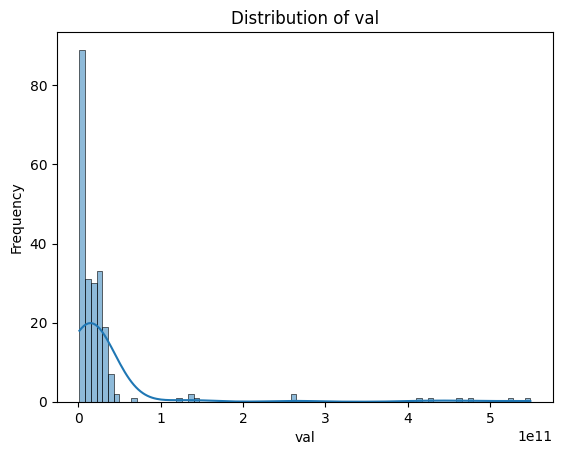

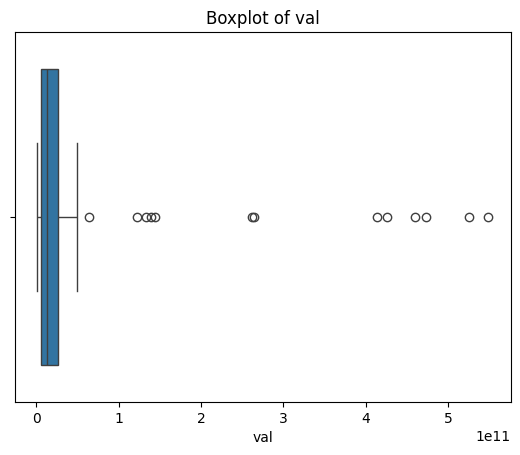

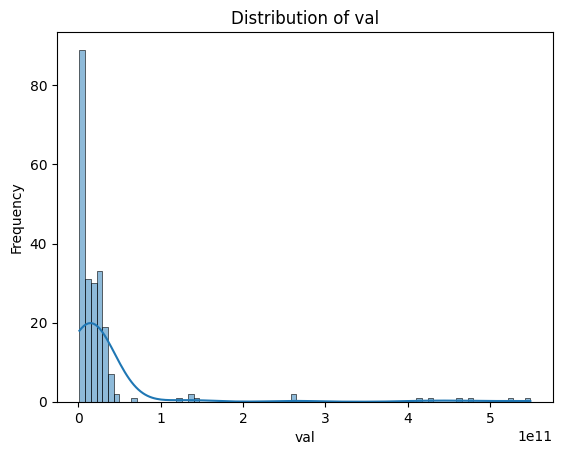

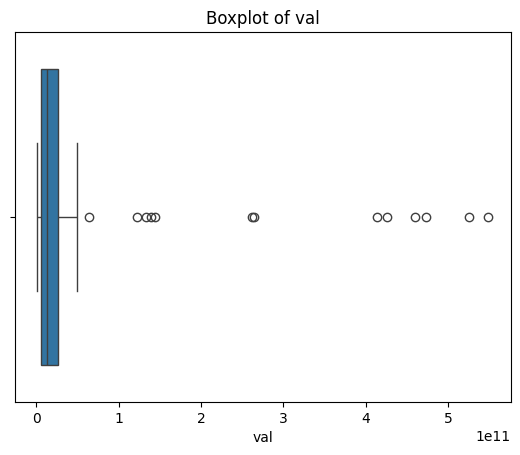

----------------------EarningsPerShareDiluted----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  Accordingly, when we announced our year-end fi...  item_1A  1001250  2015   
1  Accordingly, when we announced our year-end fi...  item_1A  1001250  2016   
2  Accordingly, when we announced our year-end fi...  item_1A  1001250  2017   
3  Accordingly, when we announced our year-end fi...  item_1A  1001250  2018   
4  Accordingly, when we announced our year-end fi...  item_1A  1001250  2019   

    val  
0  2.82  
1  2.96  
2  3.35  
3  2.95  
4  4.82  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    470 non-null    object 
 1   item    470 non-null    object 
 2   cik     470 non-null    int64  
 3   year    470 non-null    int64  


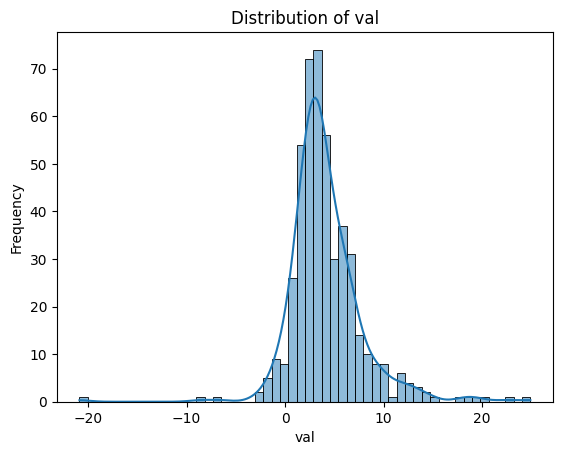

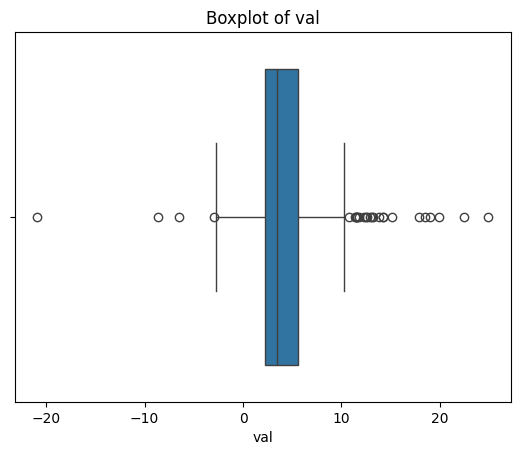

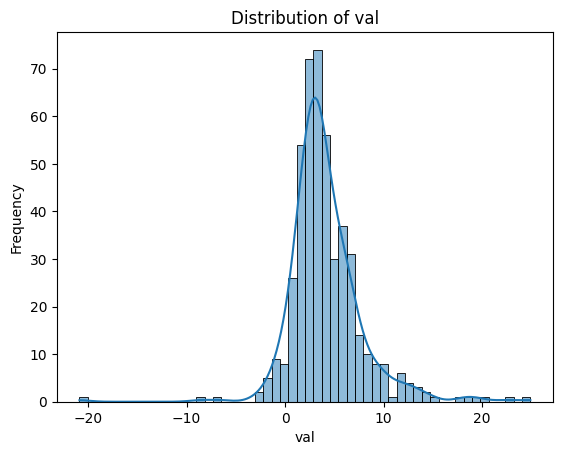

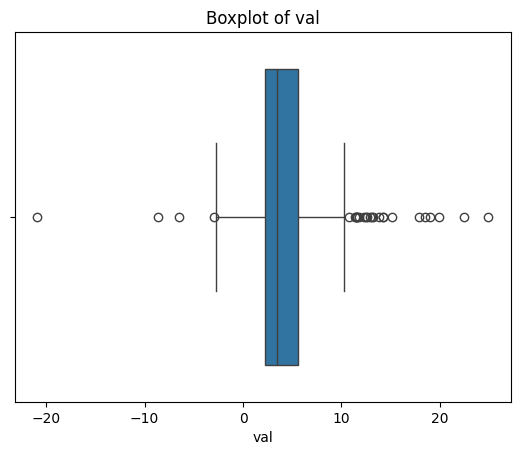

----------------------NetCashProvidedByUsedInFinancingActivities----------------------
First 5 rows of the dataset:
                                                text    item      cik  year  \
0  Global pension and PRB cash funding requiremen...  item_7   101829  2020   
1  Other long-term liabilities primarily include ...  item_7   101829  2020   
2  Amounts beyond 2023 for cash funding requireme...  item_7   101829  2020   
3  As commitments associated with letters of cred...  item_7  1099219  2015   
4  As commitments associated with letters of cred...  item_7  1099219  2016   

            val  
0 -3.860000e+09  
1 -3.860000e+09  
2 -3.860000e+09  
3 -1.218000e+09  
4 -3.497000e+09  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    25 non-null     object 
 1   item    25 non-null     object 
 2   cik     25

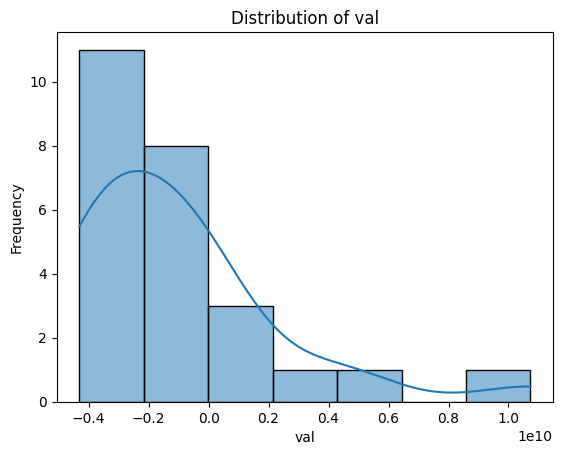

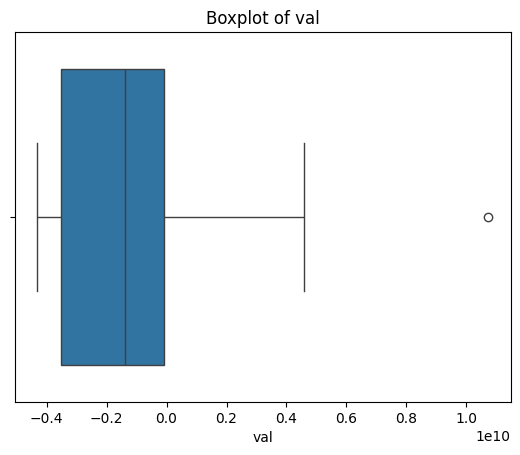

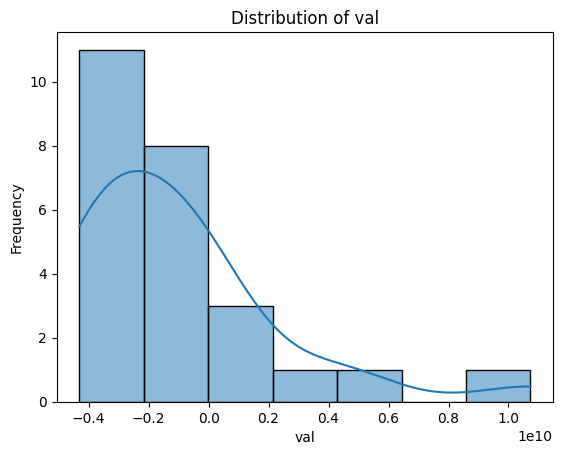

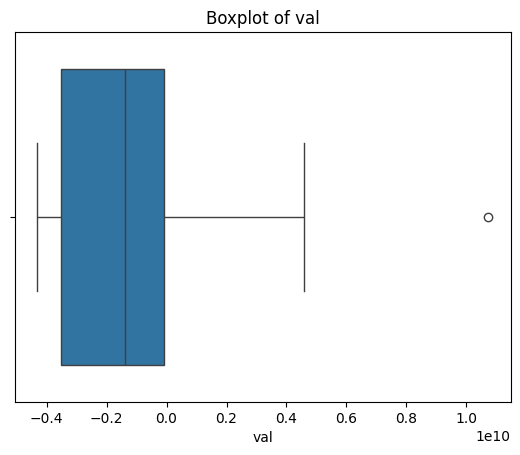

----------------------NetCashProvidedByUsedInInvestingActivities----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  A substantial delay could result in cost overr...  item_1A  1032208  2015   
1  A substantial delay could result in cost overr...  item_1A  1032208  2016   
2  We have a 25% interest in the joint venture an...  item_1A  1285785  2015   
3  We have a 25% interest in the joint venture an...  item_1A  1285785  2016   
4  We have a 25% interest in the joint venture an...  item_1A  1285785  2017   

            val  
0 -2.868000e+09  
1 -4.835000e+09  
2 -1.118400e+09  
3 -1.866000e+09  
4 -6.678000e+08  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    41 non-null     object 
 1   item    41 non-null     object 
 2   cik 

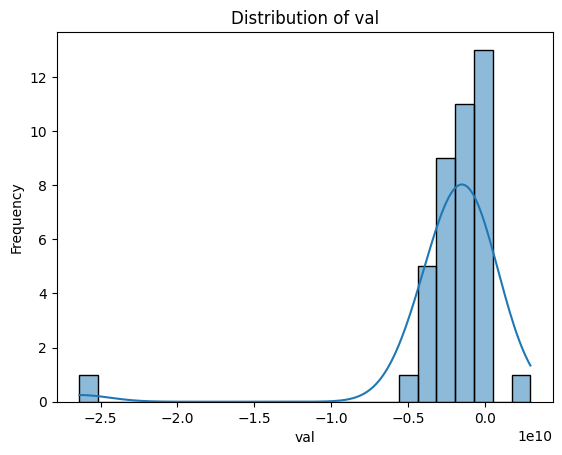

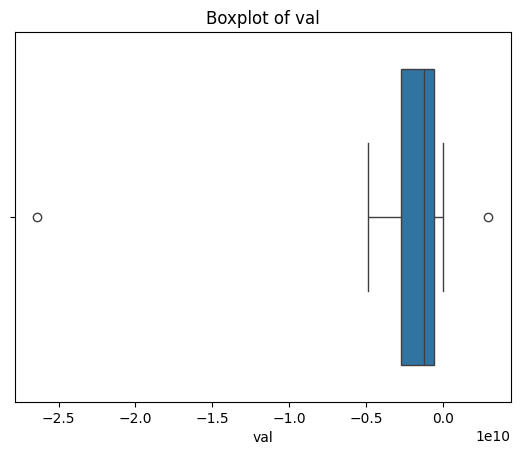

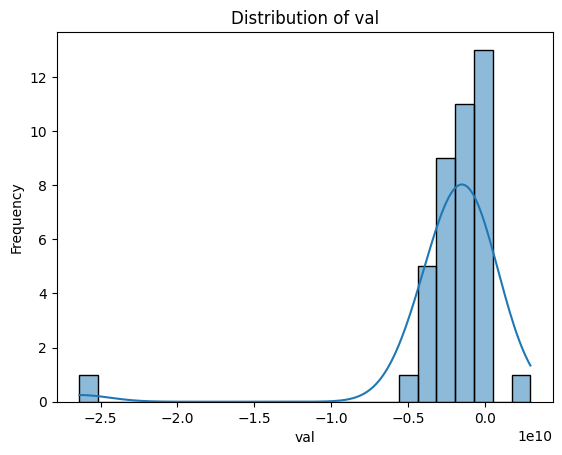

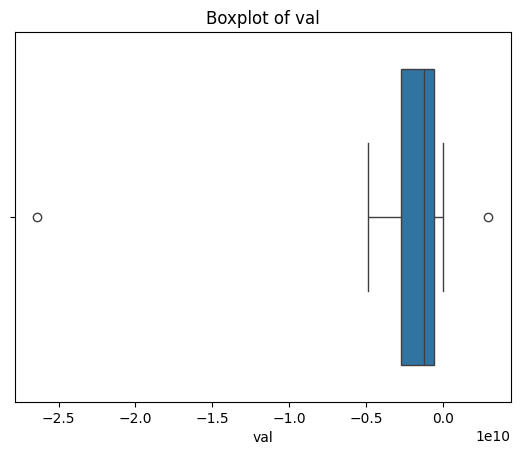

----------------------NetIncomeLoss----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  We intend to retain earnings to finance the ex...  item_1A  1000228  2015   
1  Funding requirements are based on forecasted p...   item_7  1000228  2015   
2  We also develop estimates for future levels of...   item_7  1000228  2015   
3  This comparison is made based on a review of h...   item_7  1000228  2015   
4  Where we deem it prudent, we engage in hedging...  item_7A  1000228  2015   

           val  
0  479058000.0  
1  479058000.0  
2  479058000.0  
3  479058000.0  
4  479058000.0  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    12898 non-null  object 
 1   item    12898 non-null  object 
 2   cik     12898 non-null  int64  
 

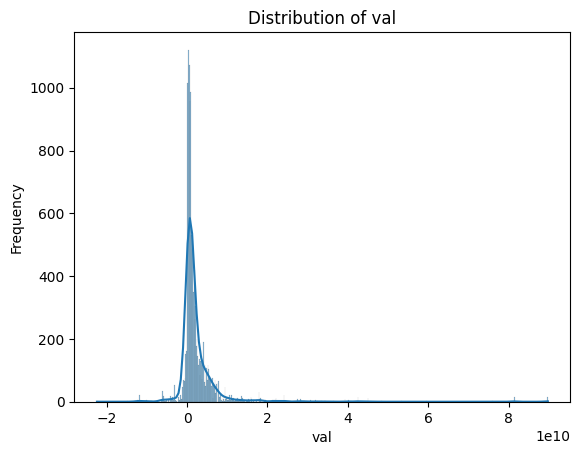

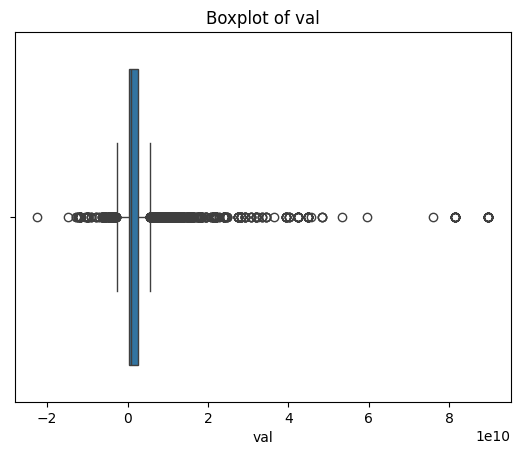

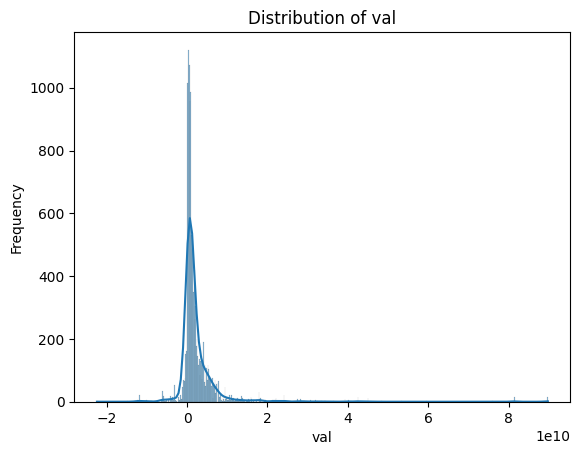

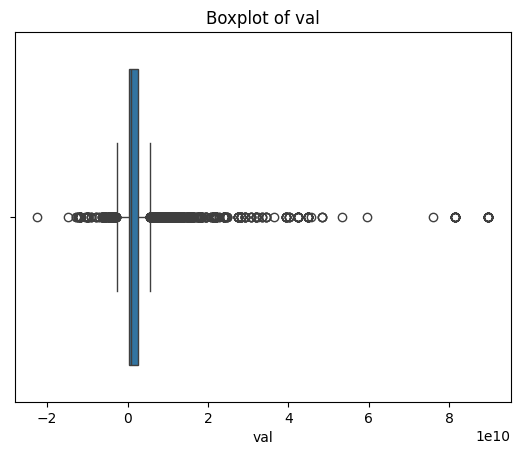

----------------------RevenueFromContractWithCustomerExcludingAssessedTax----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  As a result, the Company’s historical unremitt...  item_1A  1000697  2017   
1  Going forward, the Company estimates that its ...  item_1A  1000697  2017   
2  The $550 million income tax provision primaril...  item_1A  1000697  2017   
3  The $550 million income tax provision primaril...   item_7  1000697  2017   
4  As a result of the 2017 Tax Act, the Company w...   item_7  1000697  2017   

          val  
0  2309078000  
1  2309078000  
2  2309078000  
3  2309078000  
4  2309078000  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8850 non-null   object
 1   item    8850 non-null   object
 2   cik    

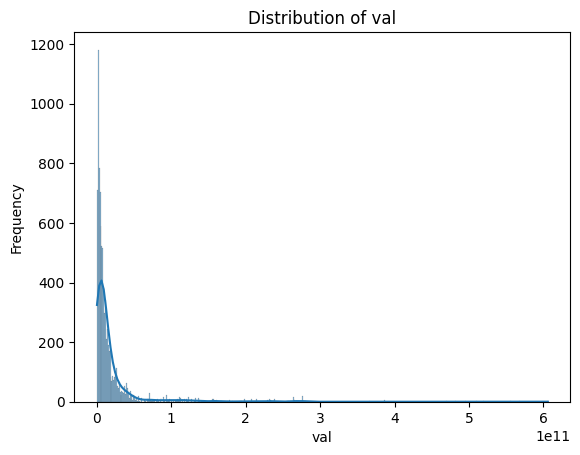

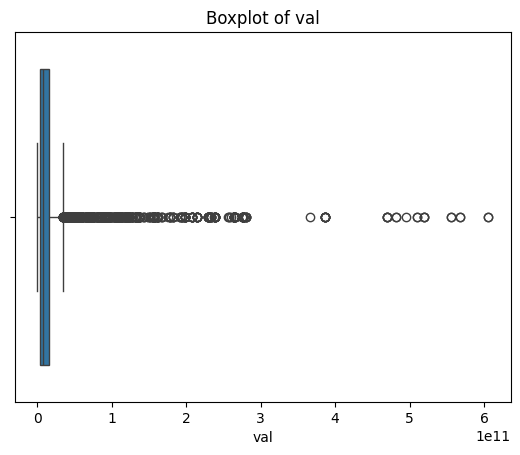

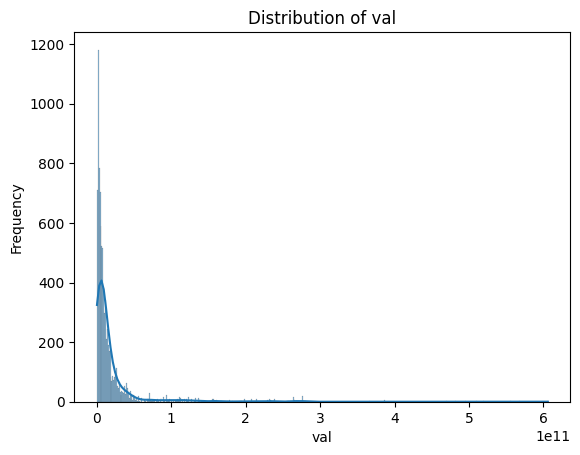

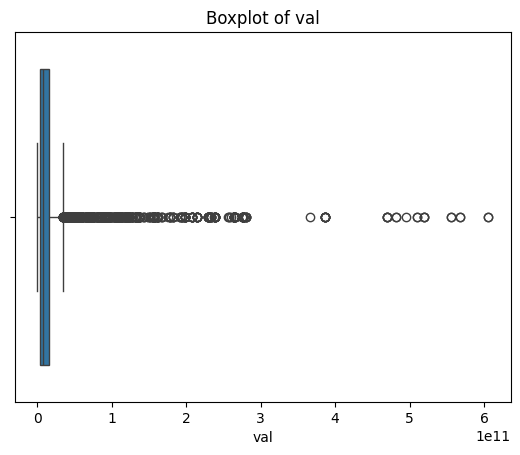

In [10]:
for file in db_files:
    data = pd.read_csv(db_file_path + file)
    metric_name = file.split('.')[0]
    print(f'----------------------{metric_name}----------------------')
    # Overview of data

    # Display the first few rows of the dataset
    print("First 5 rows of the dataset:")
    print(data.head())
    print("\n")

    # Get basic information about the dataset
    print("Basic information of the dataset:")
    print(data.info())
    print("\n")

    # Summary statistics for numerical columns
    print("Summary statistics for numerical columns:")
    print(data.describe())

    # Check for missing values
    print("Missing values in the dataset:")
    print(data.isnull().sum())

    # Data visualizations


    # Distribution of 'val'
    sns.histplot(data['val'], kde=True)
    plt.title('Distribution of val')
    plt.xlabel('val')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for 'val' to identify outliers
    sns.boxplot(x=data['val'])
    plt.title('Boxplot of val')
    plt.xlabel('val')
    plt.show()


    # Distribution of 'val'
    sns.histplot(data['val'], kde=True)
    plt.title('Distribution of val')
    plt.xlabel('val')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for 'val' to identify outliers
    sns.boxplot(x=data['val'])
    plt.title('Boxplot of val')
    plt.xlabel('val')
    plt.show()

----------------------EBIT----------------------
First 5 rows of the dataset:
                                                text     item     cik  year  \
0  Disruptions in global credit and other financi...  item_1A  100493  2015   
1  Disruptions in global credit and other financi...  item_1A  100493  2016   
2  Disruptions in global credit and other financi...  item_1A  100493  2020   
3  Additionally, operating income in fiscal 2019 ...   item_7  100493  2020   
4  Disruptions in global credit and other financi...  item_1A  100493  2021   

   val  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    936 non-null    object 
 1   item    936 non-null    object 
 2   cik     936 non-null    int64  
 3   year    936 non-null    int64  
 4   val     224 non-null    fl

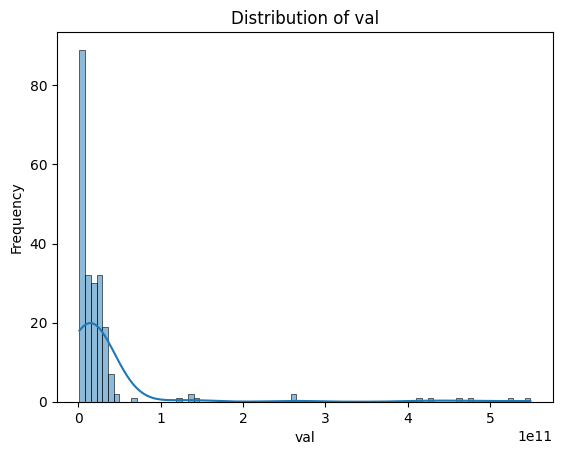

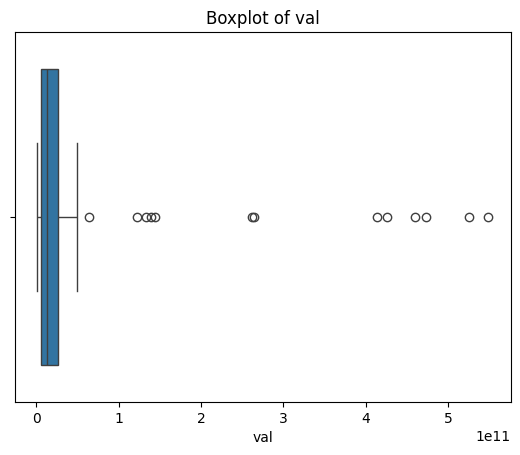

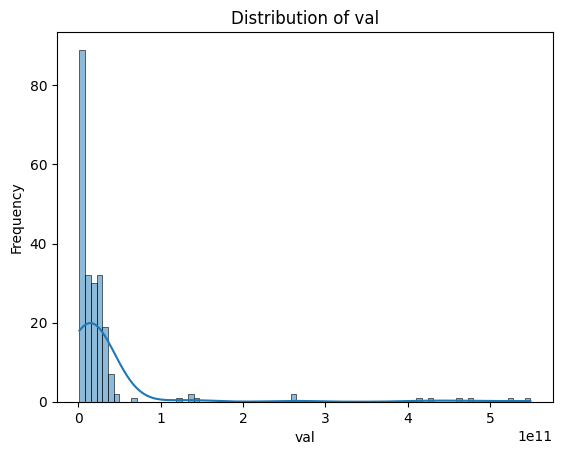

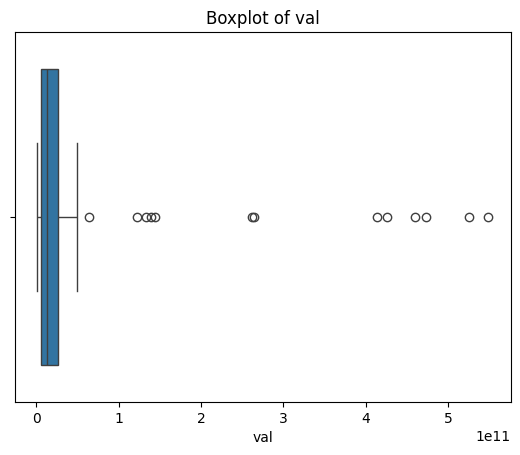

----------------------EarningsPerShareDiluted----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  Accordingly, when we announced our year-end fi...  item_1A  1001250  2015   
1  Accordingly, when we announced our year-end fi...  item_1A  1001250  2016   
2  Accordingly, when we announced our year-end fi...  item_1A  1001250  2017   
3  Accordingly, when we announced our year-end fi...  item_1A  1001250  2018   
4  Accordingly, when we announced our year-end fi...  item_1A  1001250  2019   

    val  
0  2.82  
1  2.96  
2  3.35  
3  2.95  
4  4.82  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    471 non-null    object 
 1   item    471 non-null    object 
 2   cik     471 non-null    int64  
 3   year    471 non-null    int64  


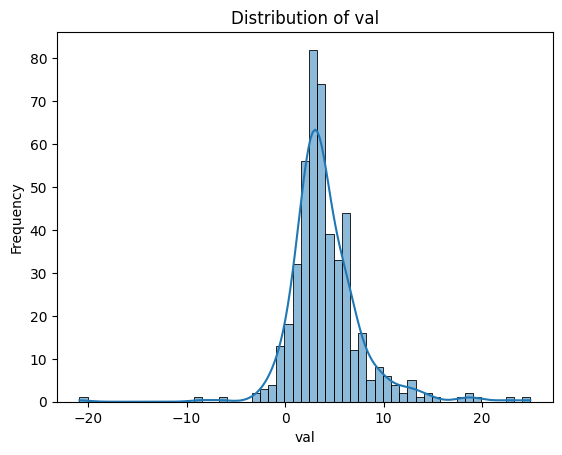

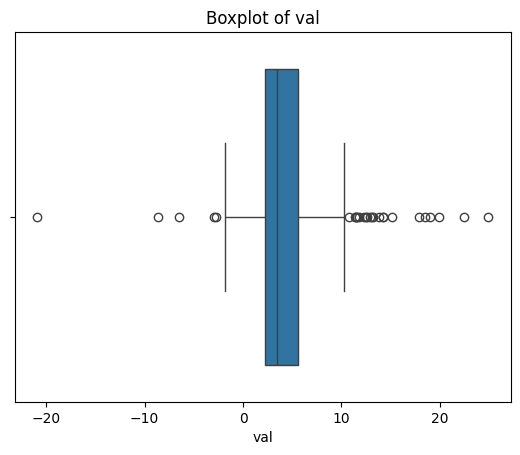

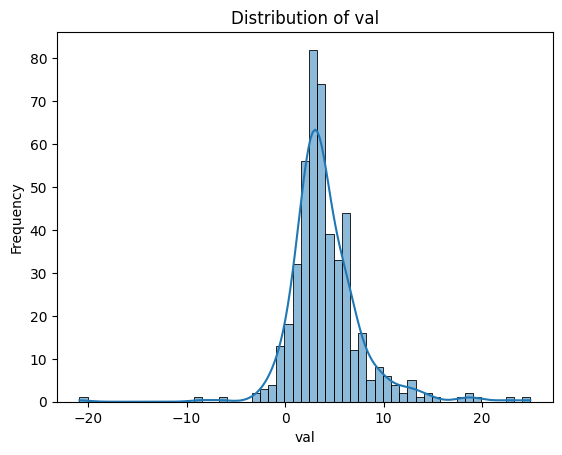

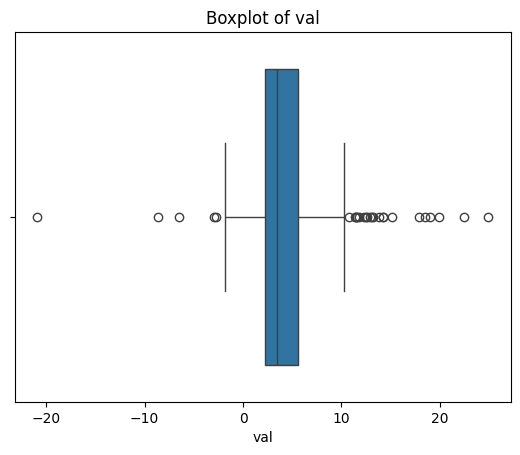

----------------------NetCashProvidedByUsedInFinancingActivities----------------------
First 5 rows of the dataset:
                                                text    item      cik  year  \
0  Global pension and PRB cash funding requiremen...  item_7   101829  2020   
1  Other long-term liabilities primarily include ...  item_7   101829  2020   
2  Amounts beyond 2023 for cash funding requireme...  item_7   101829  2020   
3  As commitments under our credit and committed ...  item_7  1099219  2018   
4  As commitments under our credit and committed ...  item_7  1099219  2019   

            val  
0 -3.860000e+09  
1 -3.860000e+09  
2 -3.860000e+09  
3 -2.801000e+09  
4  4.568000e+09  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    22 non-null     object 
 1   item    22 non-null     object 
 2   cik     22

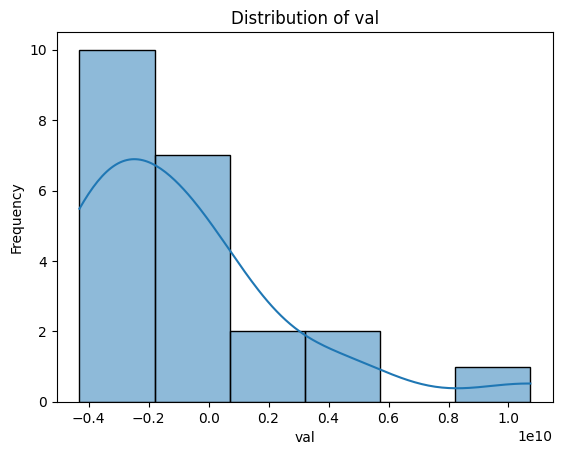

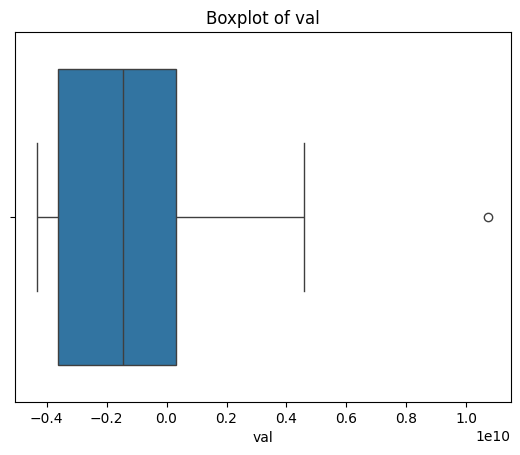

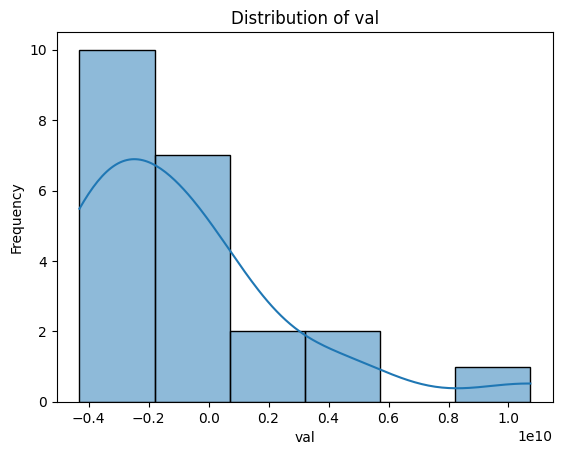

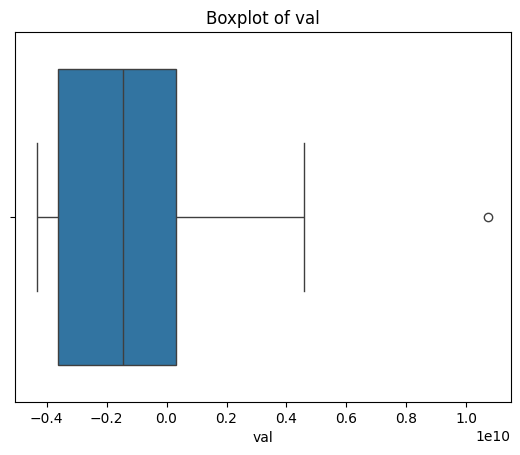

----------------------NetCashProvidedByUsedInInvestingActivities----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  A substantial delay could result in cost overr...  item_1A  1032208  2015   
1  A substantial delay could result in cost overr...  item_1A  1032208  2016   
2  We have a 25% interest in the joint venture an...  item_1A  1285785  2015   
3  We have a 25% interest in the joint venture an...  item_1A  1285785  2016   
4  We have a 25% interest in the joint venture an...  item_1A  1285785  2017   

            val  
0 -2.868000e+09  
1 -4.835000e+09  
2 -1.118400e+09  
3 -1.866000e+09  
4 -6.678000e+08  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    40 non-null     object 
 1   item    40 non-null     object 
 2   cik 

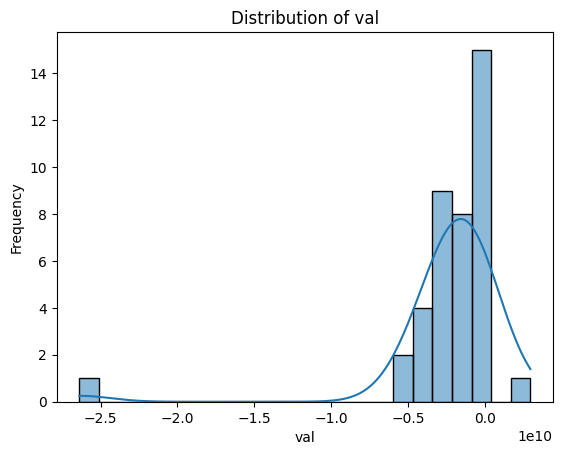

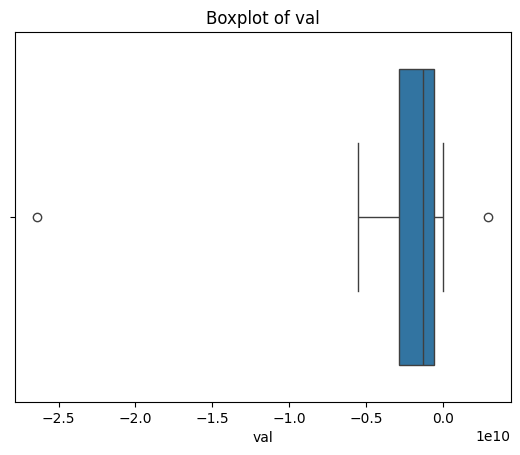

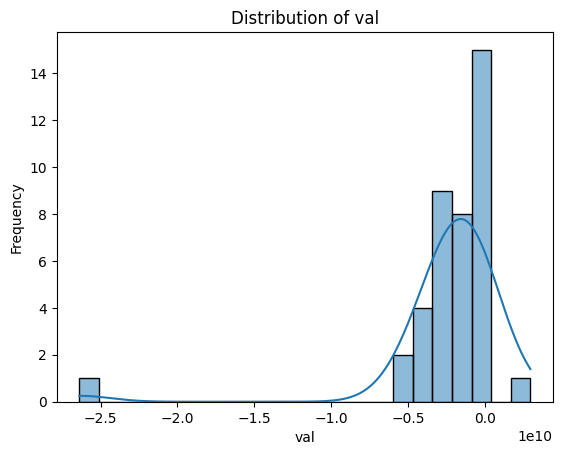

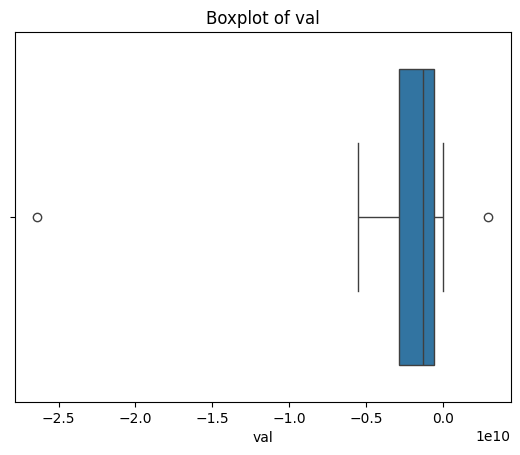

----------------------NetIncomeLoss----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  We intend to retain earnings to finance the ex...  item_1A  1000228  2015   
1  Funding requirements are based on forecasted p...   item_7  1000228  2015   
2  We also develop estimates for future levels of...   item_7  1000228  2015   
3  This comparison is made based on a review of h...   item_7  1000228  2015   
4  Where we deem it prudent, we engage in hedging...  item_7A  1000228  2015   

           val  
0  479058000.0  
1  479058000.0  
2  479058000.0  
3  479058000.0  
4  479058000.0  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    13010 non-null  object 
 1   item    13010 non-null  object 
 2   cik     13010 non-null  int64  
 

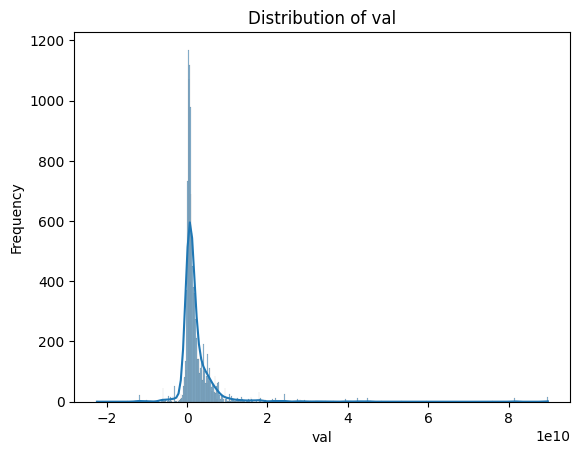

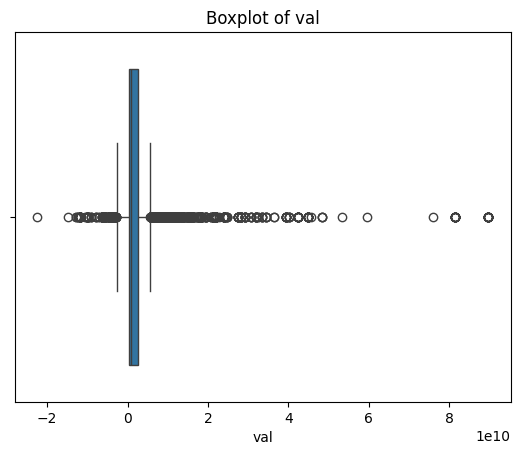

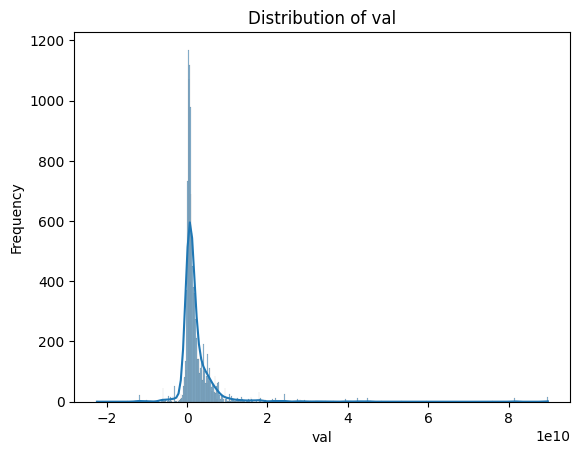

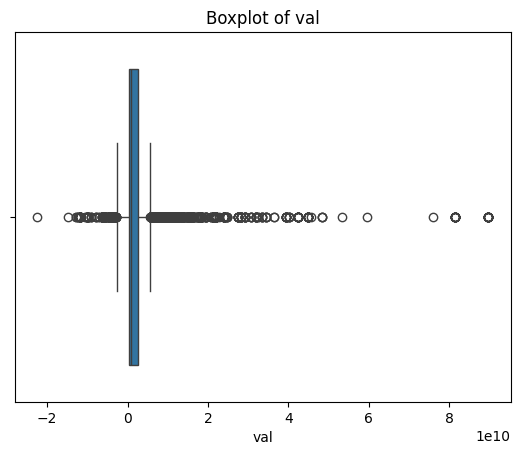

----------------------RevenueFromContractWithCustomerExcludingAssessedTax----------------------
First 5 rows of the dataset:
                                                text     item      cik  year  \
0  As a result, the Company’s historical unremitt...  item_1A  1000697  2017   
1  Going forward, the Company estimates that its ...  item_1A  1000697  2017   
2  The $550 million income tax provision primaril...  item_1A  1000697  2017   
3  The $550 million income tax provision primaril...   item_7  1000697  2017   
4  As a result of the 2017 Tax Act, the Company w...   item_7  1000697  2017   

          val  
0  2309078000  
1  2309078000  
2  2309078000  
3  2309078000  
4  2309078000  


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8823 non-null   object
 1   item    8823 non-null   object
 2   cik    

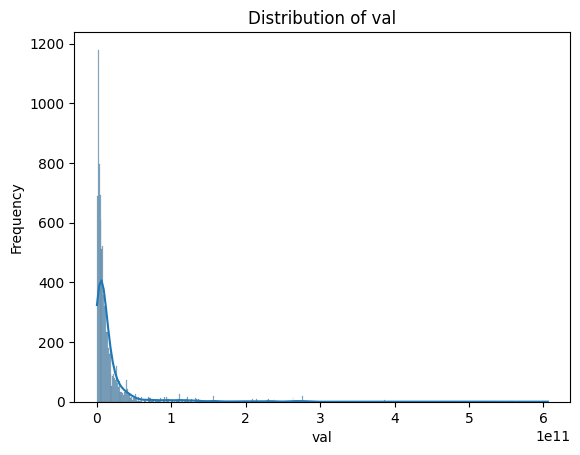

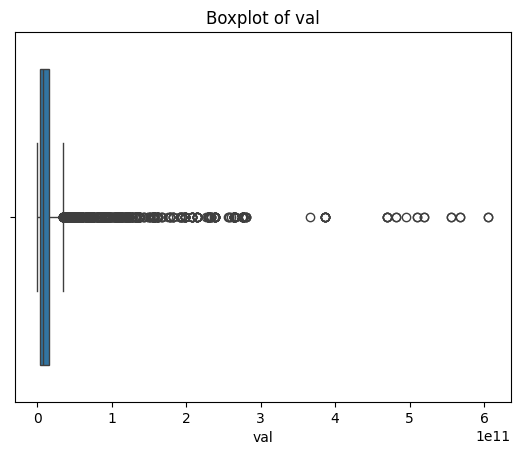

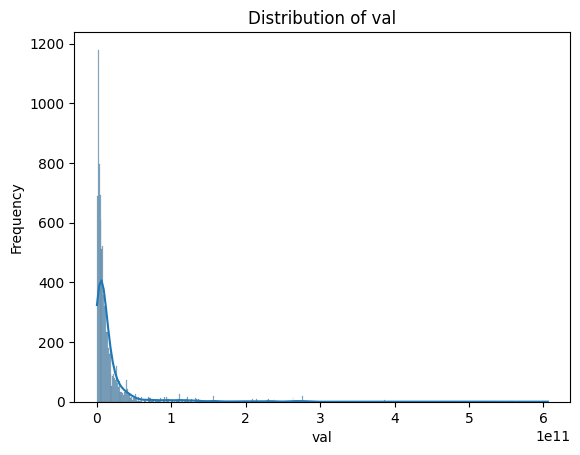

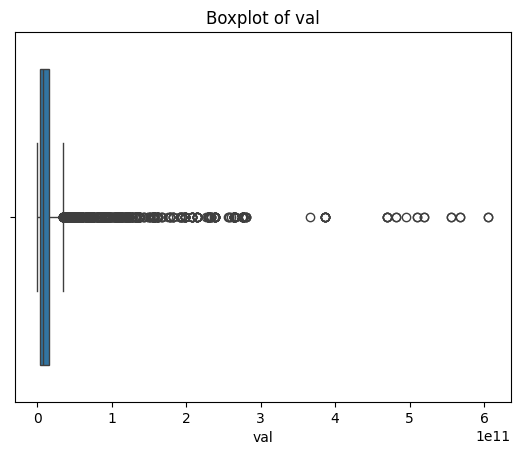

In [11]:
for file in fb_files:
    data = pd.read_csv(fb_file_path + file)
    metric_name = file.split('.')[0]
    print(f'----------------------{metric_name}----------------------')
    # Overview of data

    # Display the first few rows of the dataset
    print("First 5 rows of the dataset:")
    print(data.head())
    print("\n")

    # Get basic information about the dataset
    print("Basic information of the dataset:")
    print(data.info())
    print("\n")

    # Summary statistics for numerical columns
    print("Summary statistics for numerical columns:")
    print(data.describe())

    # Check for missing values
    print("Missing values in the dataset:")
    print(data.isnull().sum())

    # Data visualizations


    # Distribution of 'val'
    sns.histplot(data['val'], kde=True)
    plt.title('Distribution of val')
    plt.xlabel('val')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for 'val' to identify outliers
    sns.boxplot(x=data['val'])
    plt.title('Boxplot of val')
    plt.xlabel('val')
    plt.show()


    # Distribution of 'val'
    sns.histplot(data['val'], kde=True)
    plt.title('Distribution of val')
    plt.xlabel('val')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for 'val' to identify outliers
    sns.boxplot(x=data['val'])
    plt.title('Boxplot of val')
    plt.xlabel('val')
    plt.show()